<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd

Import matplotlib


In [3]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.shape[0])
df.head()

65457


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
# Write your code here
duplicates=df[df.duplicated(keep=False)]
print(duplicates.shape[0])
duplicates.head()

40


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
# Write your code here
df_mask = df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False) # Boolean Series indicating which rows are duplicates
duplicates = df[df_mask]
duplicates[['MainBranch', 'Employment', 'RemoteWork']].head()

,MainBranch,Employment,RemoteWork
0,I am a developer by profession,"Employed, full-time",Remote
1,I am a developer by profession,"Employed, full-time",Remote
2,I am a developer by profession,"Employed, full-time",Remote
3,I am learning to code,"Student, full-time",NaN
4,I am a developer by profession,"Student, full-time",NaN


In [8]:
# Count how many groups of duplicates exist
group_counts = duplicates.groupby(['MainBranch', 'Employment', 'RemoteWork']).size()
print(group_counts[group_counts > 1])  # Show only actual groups with more than 1 row

MainBranch                                                Employment                                                                               RemoteWork                          
I am a developer by profession                            Employed, full-time                                                                      Hybrid (some remote, some in-person)    15288
                                                                                                                                                   In-person                                7118
                                                                                                                                                   Remote                                  12196
                                                          Employed, full-time;Employed, part-time                                                  Hybrid (some remote, some in-person)       78
                                            

In [9]:
# Part 2
# Group duplicate rows by the three defining columns
grouped_duplicates = duplicates.groupby(['MainBranch', 'Employment', 'RemoteWork'])
# This will return True if everyone in the group has the same value in that column
def all_values_identical(series):
    return series.nunique() == 1
    
# Apply the identical-value check to every column
identical_in_groups = grouped_duplicates.agg(all_values_identical)

# Calculate the percentage of groups where each column had identical values
identical_summary = identical_in_groups.mean().sort_values(ascending=False)

# Show the top 10 columns that are most often identical across duplicates
identical_summary[identical_summary < 0.1].sort_values(ascending=True)

ResponseId                       0.000000
CodingActivities                 0.003135
BuyNewTool                       0.021944
YearsCodePro                     0.025078
TechEndorse                      0.025078
Currency                         0.031348
LearnCode                        0.037618
YearsCode                        0.040752
LanguageHaveWorkedWith           0.043887
DevType                          0.056426
Country                          0.059561
OrgSize                          0.062696
SOHow                            0.062696
NEWCollabToolsHaveWorkedWith     0.068966
LanguageWantToWorkWith           0.068966
OpSysPersonal use                0.068966
EdLevel                          0.072100
OfficeStackSyncHaveWorkedWith    0.078370
PurchaseInfluence                0.087774
ToolsTechHaveWorkedWith          0.094044
Age                              0.094044
BuildvsBuy                       0.097179
SOComm                           0.097179
LanguageAdmired                  0

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


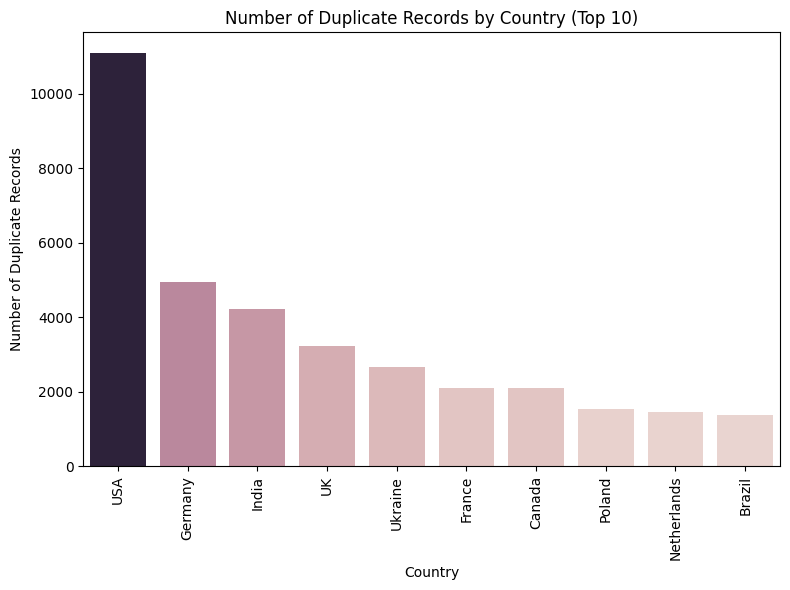

In [10]:
# Write your code here
import seaborn as sns

# Count how many duplicate rows belong to each Country
dup_by_country = df[df.duplicated(subset=['Country'], keep=False)]['Country'].value_counts()
dup_by_country = dup_by_country.reset_index()
dup_by_country.columns = ['Country', 'DuplicateCount']
dup_by_country['Country'] = dup_by_country['Country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
dup_by_country['Country'] = dup_by_country['Country'].str.replace('United States of America', 'USA')

# Plot top 10 countries
plt.figure(figsize=(8,6))
sns.barplot(data=dup_by_country.head(10), y='DuplicateCount', x='Country', hue='DuplicateCount')
plt.title('Number of Duplicate Records by Country (Top 10)')
plt.ylabel('Number of Duplicate Records')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.legend().remove()
plt.tight_layout()
plt.savefig('Task3')
plt.show()

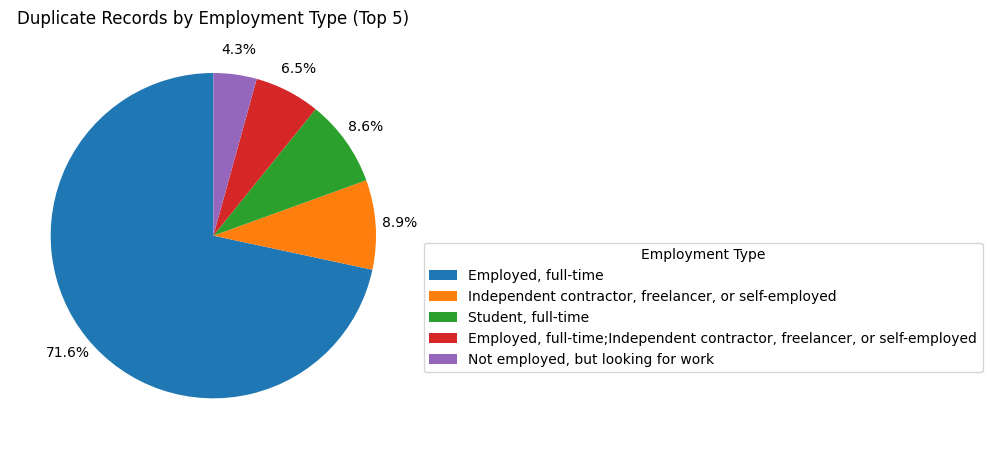

In [11]:
import matplotlib.pyplot as plt

# Prepare data (top 10 duplicates by Employment type)
dup_by_employment = df[df.duplicated(subset=['Employment'], keep=False)]['Employment'].value_counts()
top10 = dup_by_employment.head(5)

# Create pie chart
fig, ax = plt.subplots(figsize=(10,10))
wedges, texts, autotexts = ax.pie(
    top10.values,
    labels=None,  # No labels on slices
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=1.15,  # Move %s outside the pie
    # textprops={'fontsize': 10}
)

# Add legend only
ax.legend(wedges, top10.index, title="Employment Type", loc="best", bbox_to_anchor=(1, 0.5))
ax.set_title("Duplicate Records by Employment Type (Top 5)")
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [12]:
# Write your code here
# Deciding critical columns for defining uniqueness
critical_columns=identical_summary[(identical_summary < 0.05) & (identical_summary > 0)].sort_values(ascending=True).head(10)
critical_cols=critical_columns.index.tolist()

# Remove duplicates based on MainBranch, Employment, RemoteWork + critical columns
deduped_df = df.drop_duplicates(subset=['MainBranch', 'Employment', 'RemoteWork'] + critical_cols)
deduped_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65431,65432,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


#### **Explanation**:

1. Identify the rows that are exact duplicates using the `.duplicated()` function.
2. Identify columns that frequently have same entries despite the given column by the task. This indicates features that do not help uniqueness, or in other words, are more likely to contribute to a duplicate entry.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


#### **Explanation**:

To identify which columns were critical for defining uniqueness, I grouped duplicate rows based on `MainBranch`, `Employment`, and `RemoteWork`. Then, I checked how often other columns had identical values within those groups. Columns that frequently differed (less than 5% identical) were considered important for distinguishing records.

Using these critical columns, I removed duplicates — not just by full row matches, but by keeping rows unique based on a combination of grouping columns and key differentiating fields. This helped preserve meaningful data while removing true duplicates.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
